In [140]:
# Dependencies and Setup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
import flask as Flask
import sqlalchemy

In [141]:
# Read in csv file and display data
pollution = pd.read_csv("data\global air pollutiondataset.csv")
pollution.head()

,City_ID,Country,City,AQI_Value,AQI_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM2.5_AQI_Value,PM2.5_AQI_Category
0,1,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,5,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [142]:
# summary of the global air pollution dataset
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   City_ID             23463 non-null  int64 
 1   Country             23036 non-null  object
 2   City                23462 non-null  object
 3   AQI_Value           23463 non-null  int64 
 4   AQI_Category        23463 non-null  object
 5   CO_AQI_Value        23463 non-null  int64 
 6   CO_AQI_Category     23463 non-null  object
 7   Ozone_AQI_Value     23463 non-null  int64 
 8   Ozone_AQI_Category  23463 non-null  object
 9   NO2_AQI_Value       23463 non-null  int64 
 10  NO2_AQI_Category    23463 non-null  object
 11  PM2.5_AQI_Value     23463 non-null  int64 
 12  PM2.5_AQI_Category  23463 non-null  object
dtypes: int64(6), object(7)
memory usage: 2.3+ MB


In [143]:
# See all the countries
country = pollution["Country"].unique()
print(country)

['Russian Federation' 'Brazil' 'Italy' 'Poland' 'France'
 'United States of America' 'Germany' 'Belgium' 'Egypt' 'China'
 'Netherlands' 'India' 'Pakistan' 'Republic of North Macedonia' 'Colombia'
 'Romania' 'Indonesia' 'Finland' 'South Africa'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'Haiti' 'Somalia' 'Philippines' 'Latvia'
 'Chad' 'New Zealand' 'Tunisia' 'Viet Nam' 'Iran (Islamic Republic of)'
 'Mexico' 'Japan' 'El Salvador' 'Bulgaria' 'Nigeria' 'South Sudan'
 'Guatemala' 'Ireland' 'Turkey' 'Peru' 'Democratic Republic of the Congo'
 'Canada' 'Switzerland' 'Denmark' 'Cameroon' 'Australia' 'Portugal'
 "Côte d'Ivoire" 'Sweden' 'Ethiopia' 'Thailand' 'Hungary' 'Kazakhstan'
 'Israel' 'Spain' 'Myanmar' 'Papua New Guinea' 'Madagascar' 'Lithuania'
 'Ghana' 'Azerbaijan' 'Armenia' 'Ukraine' 'Malaysia' 'Serbia' 'Slovakia'
 'Gambia' 'Ecuador' 'Bosnia and Herzegovina' 'Czechia' 'Argentina'
 'Dominican Republic' 'Guinea' 'Bolivia (Plurinational State of)

In [144]:
# Find out how many countries are in the dataset
print(len(country))

176


In [145]:
# Find out how many Cities are in the dataset
city = pollution["City"].unique()
print(len(city))

23463


In [146]:
#remove nulls from dataset and reorganize columns
pollution_cleaned = pollution.dropna()
pollution_df = pollution_cleaned[['City_ID', 'City', 'Country', 'AQI_Value', 'AQI_Category', 'CO_AQI_Value', 'CO_AQI_Category', 'Ozone_AQI_Value', 'Ozone_AQI_Category', 'NO2_AQI_Value', 'NO2_AQI_Category', 'PM2.5_AQI_Value', 'PM2.5_AQI_Category']]
pollution_df

,City_ID,City,Country,AQI_Value,AQI_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM2.5_AQI_Value,PM2.5_AQI_Category
0,1,Praskoveya,Russian Federation,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,2,Presidente Dutra,Brazil,41,Good,1,Good,5,Good,1,Good,41,Good
2,3,Priolo Gargallo,Italy,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,4,Przasnysz,Poland,34,Good,1,Good,34,Good,0,Good,20,Good
4,5,Punaauia,France,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23458,23459,Gursahaiganj,India,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,23460,Sceaux,France,50,Good,1,Good,20,Good,5,Good,50,Good
23460,23461,Mormugao,India,50,Good,1,Good,22,Good,1,Good,50,Good
23461,23462,Westerville,United States of America,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [147]:
pollution_df

,City_ID,City,Country,AQI_Value,AQI_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM2.5_AQI_Value,PM2.5_AQI_Category
0,1,Praskoveya,Russian Federation,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,2,Presidente Dutra,Brazil,41,Good,1,Good,5,Good,1,Good,41,Good
2,3,Priolo Gargallo,Italy,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,4,Przasnysz,Poland,34,Good,1,Good,34,Good,0,Good,20,Good
4,5,Punaauia,France,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23458,23459,Gursahaiganj,India,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,23460,Sceaux,France,50,Good,1,Good,20,Good,5,Good,50,Good
23460,23461,Mormugao,India,50,Good,1,Good,22,Good,1,Good,50,Good
23461,23462,Westerville,United States of America,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [148]:
# Make City Table
city_table =  pollution_df[["City_ID", "City", "Country"]]
city_table


,City_ID,City,Country
0,1,Praskoveya,Russian Federation
1,2,Presidente Dutra,Brazil
2,3,Priolo Gargallo,Italy
3,4,Przasnysz,Poland
4,5,Punaauia,France
...,...,...,...
23458,23459,Gursahaiganj,India
23459,23460,Sceaux,France
23460,23461,Mormugao,India
23461,23462,Westerville,United States of America


In [149]:
#Save Tables to csv file
city_table.to_csv("data\City_Table.csv", encoding ="UTF-8", index=False)
pollution_df.to_csv("data\Global_Air_Pollution.csv", encoding = "UTF-8", index=False)

In [150]:
overall_table = pollution_df.drop(columns = ['City_ID', 'City', 'CO_AQI_Value', 'CO_AQI_Category', 'Ozone_AQI_Value', 'Ozone_AQI_Category', 'NO2_AQI_Value', 'NO2_AQI_Category', 'PM2.5_AQI_Value', 'PM2.5_AQI_Category'])
overall_table

,Country,AQI_Value,AQI_Category
0,Russian Federation,51,Moderate
1,Brazil,41,Good
2,Italy,66,Moderate
3,Poland,34,Good
4,France,22,Good
...,...,...,...
23458,India,184,Unhealthy
23459,France,50,Good
23460,India,50,Good
23461,United States of America,71,Moderate


In [151]:
# Setting up tables for each pollutant
CO_table = pollution_df.drop(columns = ['City_ID', 'City', 'AQI_Value', 'AQI_Category', 'Ozone_AQI_Value', 'Ozone_AQI_Category', 'NO2_AQI_Value', 'NO2_AQI_Category', 'PM2.5_AQI_Value', 'PM2.5_AQI_Category'])
Ozone_table = pollution_df.drop(columns = ['City_ID', 'City', 'AQI_Value', 'AQI_Category', 'CO_AQI_Value', 'CO_AQI_Category', 'NO2_AQI_Value', 'NO2_AQI_Category', 'PM2.5_AQI_Value', 'PM2.5_AQI_Category'])
NO2_table = pollution_df.drop(columns = ['City_ID', 'City', 'AQI_Value', 'AQI_Category', 'CO_AQI_Value', 'CO_AQI_Category', 'Ozone_AQI_Value', 'Ozone_AQI_Category', 'PM2.5_AQI_Value', 'PM2.5_AQI_Category'])
PM_table = pollution_df.drop(columns = ['City_ID', 'City', 'AQI_Value', 'AQI_Category', 'CO_AQI_Value', 'CO_AQI_Category', 'Ozone_AQI_Value', 'Ozone_AQI_Category', 'NO2_AQI_Value', 'NO2_AQI_Category'])


In [152]:
# Find and sort average overall AQI showing top 5
AQI_mean = pollution_df.groupby("Country")["AQI_Value"].mean()
AQI_mean.sort_values(ascending=False).head(5)


Country
Republic of Korea       421.000000
Bahrain                 188.000000
Mauritania              179.000000
Pakistan                178.788274
United Arab Emirates    163.666667
Name: AQI_Value, dtype: float64

In [153]:
AQI_mean.sort_values(ascending=False).tail(5)

Country
Bolivia (Plurinational State of)    23.787879
Iceland                             23.000000
Maldives                            19.000000
Solomon Islands                     18.000000
Palau                               16.000000
Name: AQI_Value, dtype: float64

In [154]:
# Find and sort average Carbon Monoxide AQI showing top 5
CO_mean = pollution_df.groupby ("Country")["CO_AQI_Value"].mean()
CO_mean.sort_values(ascending=False).head(5)

Country
Republic of Korea                   27.000000
South Africa                         5.379310
Democratic Republic of the Congo     5.285714
Kingdom of Eswatini                  4.666667
Nigeria                              3.812500
Name: CO_AQI_Value, dtype: float64

In [155]:
CO_mean.sort_values(ascending=False).tail(5)

Country
Barbados       0.0
Saint Lucia    0.0
Seychelles     0.0
Cabo Verde     0.0
Aruba          0.0
Name: CO_AQI_Value, dtype: float64

In [156]:
# Find and sort average Ozone AQI showing top 5
Ozone_mean = pollution_df.groupby("Country")["Ozone_AQI_Value"].mean()
Ozone_mean.sort_values(ascending=False).head(5)

Country
United Arab Emirates    159.666667
Qatar                   139.000000
Kuwait                  135.666667
Bahrain                 127.000000
Oman                     97.833333
Name: Ozone_AQI_Value, dtype: float64

In [157]:
Ozone_mean.sort_values(ascending=False).tail(5)

Country
South Sudan                         10.416667
Chile                               10.049383
Colombia                             9.776000
Bolivia (Plurinational State of)     8.333333
Republic of Korea                    0.000000
Name: Ozone_AQI_Value, dtype: float64

In [158]:
# Find and sort average Nitrogen Dioxide AQI showing top 5
NO2_mean = pollution_df.groupby ("Country")["NO2_AQI_Value"].mean()
NO2_mean.sort_values(ascending=False).head(5)

Country
Republic of Korea    91.000000
Kuwait               13.666667
El Salvador           9.393939
Algeria               9.333333
Chile                 8.592593
Name: NO2_AQI_Value, dtype: float64

In [159]:
NO2_mean.sort_values(ascending=False).tail(5)

Country
Eritrea              0.0
Equatorial Guinea    0.0
Comoros              0.0
Solomon Islands      0.0
Namibia              0.0
Name: NO2_AQI_Value, dtype: float64

In [160]:
# Find and sort average Particulate Matter showing top 5
# (with a diameter of 2.5 micrometers or less of the city) AQI
PM_mean = pollution_df.groupby ("Country")["PM2.5_AQI_Value"].mean()
PM_mean.sort_values(ascending=False).head(5)

Country
Republic of Korea    415.000000
Bahrain              188.000000
Mauritania           179.000000
Pakistan             173.110749
Aruba                163.000000
Name: PM2.5_AQI_Value, dtype: float64

In [161]:
PM_mean.sort_values(ascending=False).tail(5)

Country
Norway             18.571429
Iceland            18.333333
Maldives           15.000000
Palau               7.000000
Solomon Islands     6.000000
Name: PM2.5_AQI_Value, dtype: float64

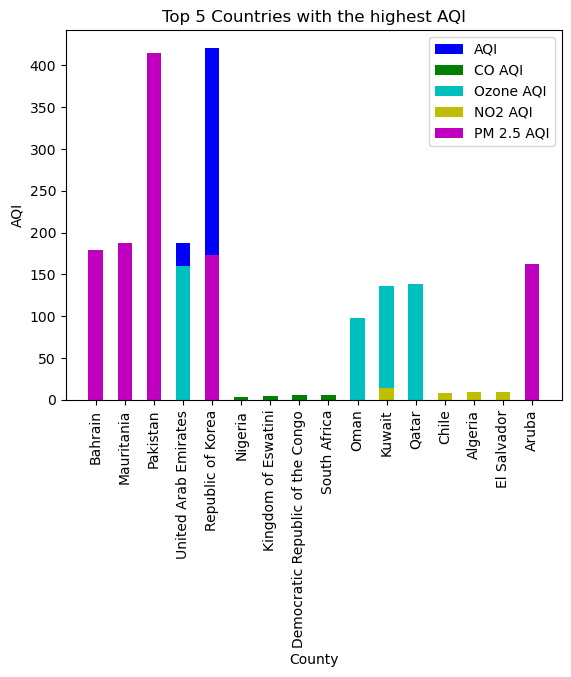

In [162]:
# Create plot for top pollutants
# plot:    
                   
plt.bar(["Bahrain","Mauritania","Pakistan","United Arab Emirates","Republic of Korea"],[163.666667,178.788274,179.000000,188.000000,421.000000],
label="AQI",color='b',width=0.5)
plt.bar(["Nigeria","Kingdom of Eswatini","Democratic Republic of the Congo","South Africa","Republic of Korea"],[3.812500,4.666667,5.285714,5.379310,27.000000],
label="CO AQI", color='g',width=.5)
plt.bar(["Oman","Bahrain","Kuwait","Qatar","United Arab Emirates"],[97.833333,127.000000,135.666667,139.000000,159.666667],
label="Ozone AQI", color='c',width=.5)
plt.bar(["Chile","Algeria","El Salvador","Kuwait","Republic of Korea"],[8.592593,9.333333,9.393939,13.666667,91.000000],
label="NO2 AQI", color='y',width=.5)
plt.bar(["Aruba", "Pakistan","Mauritania","Bahrain","Republic of Korea"],[163.000000,415.000000,188.000000,179.000000,173.110749],
label="PM 2.5 AQI", color='m',width=.5)
plt.legend()
plt.xlabel('County')
plt.xticks(rotation=90)
plt.ylabel('AQI')
plt.title('Top 5 Countries with the highest AQI')
plt.savefig("Top_5_Countries")
# Print the chart
plt.show()

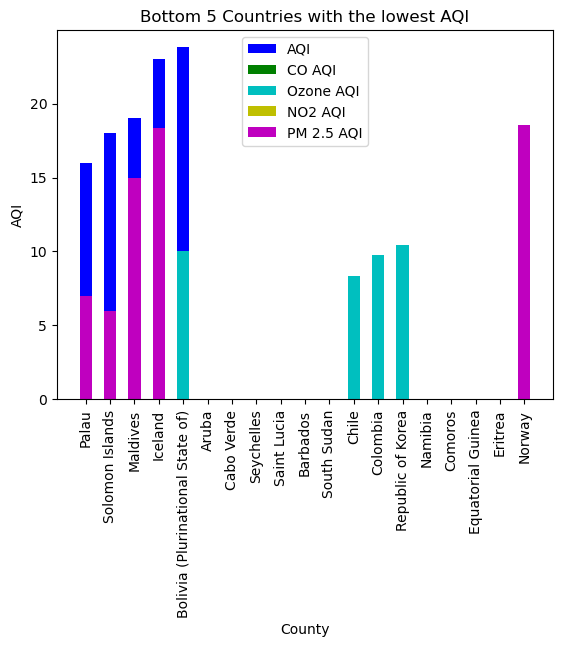

In [163]:
# Create plot for lowest pollutants
# plot:    
                   
plt.bar(["Palau", "Solomon Islands" ,"Maldives", "Iceland", "Bolivia (Plurinational State of)"],[16.000000,18.000000,19.000000,23.000000,23.787879],
label="AQI",color='b',width=0.5)
plt.bar(["Aruba","Cabo Verde", "Seychelles", "Saint Lucia", "Barbados"],[0, 0, 0, 0, 0],
label="CO AQI", color='g',width=.5)
plt.bar(["South Sudan","Chile","Colombia","Bolivia (Plurinational State of)","Republic of Korea"],[0.000000,8.333333,9.776000,10.049383,10.416667],
label="Ozone AQI", color='c',width=.5)
plt.bar(["Namibia","Solomon Islands","Comoros","Equatorial Guinea","Eritrea"],[0,0,0,0,0],
label="NO2 AQI", color='y',width=.5)
plt.bar(["Solomon Islands", "Palau","Maldives","Iceland","Norway"],[6.000000,7.000000,15.000000,18.333333,18.571429],
label="PM 2.5 AQI", color='m',width=.5)
plt.legend()
plt.xlabel('County')
plt.xticks(rotation=90)
plt.ylabel('AQI')
plt.title('Bottom 5 Countries with the lowest AQI')
plt.savefig("Bottom_5_Countries")
# Print the chart
plt.show()


In [164]:
#Find out the pollution in the United States
USA_AQI = pollution_df.loc[pollution_df["Country"] == "United States of America", :]
USA_AQI["AQI_Value"].mean()

59.74059888579387

In [165]:
#Find out the Carbon Monoxide pollution in the United States
USA_AQI["CO_AQI_Value"].mean()

1.456824512534819

In [166]:
#Find out the Ozone pollution in the United States
USA_AQI["Ozone_AQI_Value"].mean()

27.619777158774372

In [167]:
# Find out the Nitrogen Dioxide Pollution in the United States
USA_AQI["NO2_AQI_Value"].mean()

8.541434540389972

In [168]:
#Find out the Particulate Matter (with a diameter of 2.5 micrometers or less of the city) pollution in the United States
USA_AQI["PM2.5_AQI_Value"].mean()

58.051532033426184